# Perceptron Multi Couches

In [4]:
import CLibrary as CLib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import math

In [7]:
def get(i, l):
    return [z[i] for z in l]

## Single Class

### Linear Multiple :
- <font color='green'>Linear Model : OK</font>
- <font color='green'>MLP (2, 1) : OK</font>

In [5]:
X = np.concatenate([np.random.random((50, 2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

N = [2, 1]  
mlpClassif_1 = CLib.init(N)

sampleCount = 100

CLib.fit_classification(
    mlpClassif_1,
    XF, 
    YF,
    sampleCount,
    50000,
    0.001 
)

140276363472208

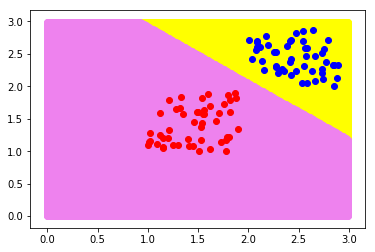

<Figure size 432x288 with 0 Axes>

In [6]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(0, 300) for j in range(0, 300)
]
YPredicted = [
    CLib.predict(mlpClassif_1, x, N) for x in XToPredict
]

yellow = []
purple = []
for i, val in enumerate(YPredicted):
    if val[0] >= 0:
        purple.append(XToPredict[i])
    else:
        yellow.append(XToPredict[i])
        
plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="yellow"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="violet"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] > 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] > 0]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] < 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] < 0]),
    color='blue'
)
plt.show()
plt.clf()

### XOR :
- <font color='red'>Linear Model : KO</font>
- <font color='green'>MLP (2, 2, 1) : OK</font>

In [8]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([1, -1, -1, 1])

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

sampleCount = 4

N = [2, 2, 1]  
mlpClassif_2 = CLib.init(N)

CLib.fit_classification(
    mlpClassif_2,
    XF, 
    YF,
    sampleCount,
    5000,
    0.01 
)

140275614583104

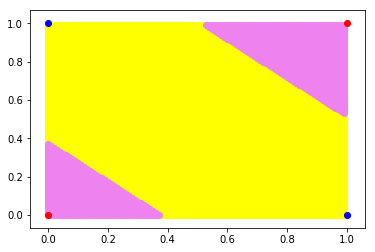

<Figure size 432x288 with 0 Axes>

In [9]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(0, 100) for j in range(0, 100)
]
YPredicted = [
    CLib.predict(mlpClassif_2, x, N) for x in XToPredict
]

yellow = []
purple = []
for i, val in enumerate(YPredicted):
    if val[0] >= 0:
        purple.append(XToPredict[i])
    else:
        yellow.append(XToPredict[i])
        
plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="yellow"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="violet"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] > 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] > 0]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] < 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] < 0]),
    color='blue'
)
plt.show()
plt.clf()

### Cross :
- <font color='red'>Linear Model : KO</font>
- <font color='green'>MLP (2, 4, 1) : OK</font>

In [5]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

sampleCount = 500

N = [2, 4, 1]  
mlpClassif_3 = CLib.init(N)

CLib.fit_classification(
    mlpClassif_3,
    XF, 
    YF,
    sampleCount,
    1000,
    0.01 
)

140714577004368

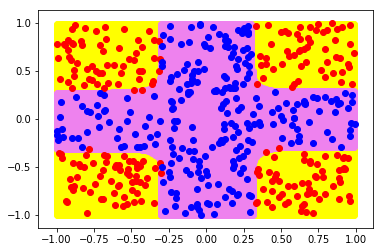

<Figure size 432x288 with 0 Axes>

In [8]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(-100, 100) for j in range(-100, 100)
]
YPredicted = [
    CLib.predict(mlpClassif_3, x, N) for x in XToPredict
]

yellow = []
purple = []
for i, val in enumerate(YPredicted):
    if val[0] >= 0:
        purple.append(XToPredict[i])
    else:
        yellow.append(XToPredict[i])
        
plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="yellow"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="violet"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] < 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] < 0]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] > 0]),
    get(1, [x for j, x in enumerate(X) if Y[j] > 0]),
    color='blue'
)
plt.show()
plt.clf()

## Multi Class

### Linear Multiple :
- <font color='green'>Linear Model : OK</font>
- <font color='green'>MLP (2, 3) : OK</font>

In [16]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

sampleCount = 500

N = [2, 3]
mlpClassif_4 = CLib.init(N)

CLib.fit_classification(
    mlpClassif_4,
    XF, 
    YF,
    sampleCount,
    10000,
    0.01 
)

140710554835280

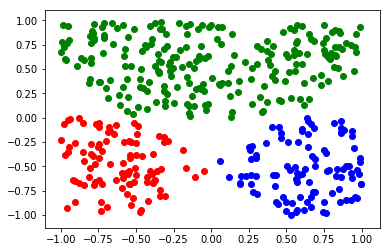

<Figure size 432x288 with 0 Axes>

In [15]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(-150, 150) for j in range(-150, 150)
]
YPredicted = [
    CLib.predict(mlpClassif_4, x, N) for x in XToPredict
]

yellow = []
purple = []
brown = []

for i, val in enumerate(YPredicted):
    #print(val)
    if val == [1, -1, -1]:
        yellow.append(XToPredict[i])
    elif val == [-1, 1, -1]:
        brown.append(XToPredict[i])
    elif val == [-1, -1, 1]:
        purple.append(XToPredict[i])

def get(i, l):
    return [z[i] for z in l]

plt.scatter(
    get(0, yellow),
    get(1, yellow),
    color="yellow"
)
plt.scatter(
    get(0, purple),
    get(1, purple),
    color="violet"
)
plt.scatter(
    get(0, brown),
    get(1, brown),
    color="brown"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if (Y[j] == [1, 0, 0]).all() ]),
    get(1, [x for j, x in enumerate(X) if (Y[j] == [1, 0, 0]).all() ]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if (Y[j] == [0, 1, 0]).all() ]),
    get(1, [x for j, x in enumerate(X) if (Y[j] == [0, 1, 0]).all() ]),
    color='green'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if (Y[j] == [0, 0, 1]).all() ]),
    get(1, [x for j, x in enumerate(X) if (Y[j] == [0, 0, 1]).all() ]),
    color='blue'
)
plt.show()
plt.clf()

### Multi Cross :
- <font color='red'>Linear Model x3 : KO</font>
- <font color='green'>MLP (2, ?, ?, 1) : OK</font>

In [1]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

XF = X.flatten().tolist()
YF = Y.flatten().tolist()

sampleCount = 1000

NameError: name 'np' is not defined

##### 1 - MLP (2, 2, 2, 3)

In [58]:
N = [2, 2, 2, 3]
mlpClassif_5_1 = CLib.init(N)

CLib.fit_classification(
    mlpClassif_5_1,
    XF, 
    YF,
    sampleCount,
    10000,
    0.01 
)

140266634884112

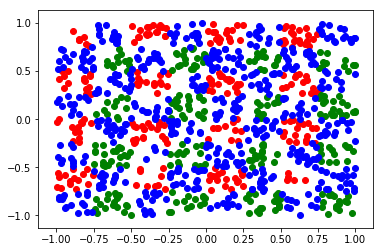

<Figure size 432x288 with 0 Axes>

In [59]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(-100, 100) for j in range(-100, 100)
]
YPredicted = [
    CLib.predict(mlpClassif_5_1, x, N) for x in XToPredict
]

reds = []
blues = []
greens = []

for i, val in enumerate(YPredicted):
    if val == [1, -1, -1]:
        reds.append(XToPredict[i])
    elif val == [-1, 1, -1]:
        greens.append(XToPredict[i])
    elif val == [-1, -1, 1]:
        blues.append(XToPredict[i])

def get(i, l):
    return [z[i] for z in l]

plt.scatter(
    get(0, reds),
    get(1, reds),
    color="yellow"
)
plt.scatter(
    get(0, blues),
    get(1, blues),
    color="violet"
)
plt.scatter(
    get(0, greens),
    get(1, greens),
    color="brown"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == [1, 0, 0]]),
    get(1, [x for j, x in enumerate(X) if Y[j] == [1, 0, 0]]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == [0, 1, 0]]),
    get(1, [x for j, x in enumerate(X) if Y[j] == [0, 1, 0]]),
    color='green'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == [0, 0, 1]]),
    get(1, [x for j, x in enumerate(X) if Y[j] == [0, 0, 1]]),
    color='blue'
)
plt.show()
plt.clf()

##### 1 - MLP (2, 4, 6, 3)

In [ ]:
N = [2, 4, 6, 3]
mlpClassif_5_2 = CLib.init(N)

CLib.fit_classification(
    mlpClassif_5_2,
    XF, 
    YF,
    sampleCount,
    10000,
    0.01 
)

In [ ]:
XToPredict = [
    [i / 100.0, j / 100.0]
    for i in range(-100, 100) for j in range(-100, 100)
]
YPredicted = [
    CLib.predict(mlpClassif_5_2, x, N) for x in XToPredict
]

reds = []
blues = []
greens = []

for i, val in enumerate(YPredicted):
    if val == [1, -1, -1]:
        reds.append(XToPredict[i])
    elif val == [-1, 1, -1]:
        greens.append(XToPredict[i])
    elif val == [-1, -1, 1]:
        blues.append(XToPredict[i])

def get(i, l):
    return [z[i] for z in l]

plt.scatter(
    get(0, reds),
    get(1, reds),
    color="yellow"
)
plt.scatter(
    get(0, blues),
    get(1, blues),
    color="violet"
)
plt.scatter(
    get(0, greens),
    get(1, greens),
    color="brown"
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == [1, 0, 0]]),
    get(1, [x for j, x in enumerate(X) if Y[j] == [1, 0, 0]]),
    color='red'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == [0, 1, 0]]),
    get(1, [x for j, x in enumerate(X) if Y[j] == [0, 1, 0]]),
    color='green'
)
plt.scatter(
    get(0, [x for j, x in enumerate(X) if Y[j] == [0, 0, 1]]),
    get(1, [x for j, x in enumerate(X) if Y[j] == [0, 0, 1]]),
    color='blue'
)
plt.show()
plt.clf()